In [3]:
#Importing 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import uniform

# from xgboost import XGBRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.feature_selection import RFECV
# from sklearn.preprocessing import RobustScaler
# from sklearn.metrics import make_scorer 

# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Load data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df = df_train.append(df_test, ignore_index = True)

/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
# First inspection
df_train.shape, df_test.shape, df_train.columns.values

((1460, 81),
 (1459, 80),
 array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
        'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
        'Gara

In [5]:
print(df.SalePrice)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
2889         NaN
2890         NaN
2891         NaN
2892         NaN
2893         NaN
2894         NaN
2895         NaN
2896         NaN
2897         NaN
2898         NaN
2899         NaN
2900         NaN
2901         NaN
2902         NaN
2903         NaN
2904         NaN
2905         NaN
2906         NaN
2907         NaN
2908         NaN
2909         NaN
2910         NaN
2911         NaN
2912         NaN
2913         NaN
2914         NaN
2915         NaN
2916         N

In [6]:
print(df)

      1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0          856       854          0   NaN             3     1Fam       TA   
1         1262         0          0   NaN             3     1Fam       TA   
2          920       866          0   NaN             3     1Fam       TA   
3          961       756          0   NaN             3     1Fam       Gd   
4         1145      1053          0   NaN             4     1Fam       TA   
5          796       566        320   NaN             1     1Fam       TA   
6         1694         0          0   NaN             3     1Fam       TA   
7         1107       983          0   NaN             3     1Fam       TA   
8         1022       752          0   NaN             2     1Fam       TA   
9         1077         0          0   NaN             2   2fmCon       TA   
10        1040         0          0   NaN             3     1Fam       TA   
11        1182      1142          0   NaN             4     1Fam       TA   

In [7]:
#Log-Transfrom SalesPrice. The final result will be predicted by Root Mean Square Error (RMSE) logarithm
df.SalePrice = np.log(df.SalePrice)

In [8]:
# Separate data to numerical ("quantitive") and categorical ("qualities")
quan = list(df_test.loc[:,df_test.dtypes != 'object'].drop('Id',axis=1).columns.values)
qual = list(df_test.loc[:,df_test.dtypes == 'object'].columns.values)

In [9]:
# Cleanse Data: Find out how many missing values in quan and qual
hasNAN = df[quan].isnull().sum()
hasNAN = hasNAN[hasNAN > 0]
hasNAN = hasNAN.sort_values(ascending=False)
print(hasNAN)
print('**'*42)
hasNAN = df[qual].isnull().sum()
hasNAN = hasNAN[hasNAN > 0]
hasNAN = hasNAN.sort_values(ascending=False)
print(hasNAN)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64
************************************************************************************
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Exterior1st        1
SaleType           1
Exterior2nd        1
KitchenQual        1
Electrical         1
dtype: int64


In [10]:
#Filling missing values for numeric data. Most of NAN are facilities/structures are not existed
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
df.GarageYrBlt.fillna(0, inplace=True)
df.MasVnrArea.fillna(0, inplace=True)    
df.BsmtHalfBath.fillna(0, inplace=True)
df.BsmtFullBath.fillna(0, inplace=True)
df.GarageArea.fillna(0, inplace=True)
df.GarageCars.fillna(0, inplace=True)    
df.TotalBsmtSF.fillna(0, inplace=True)   
df.BsmtUnfSF.fillna(0, inplace=True)     
df.BsmtFinSF2.fillna(0, inplace=True)    
df.BsmtFinSF1.fillna(0, inplace=True)

In [11]:
# Filling missing values for categories features
df.PoolQC.fillna('NA', inplace=True)
df.MiscFeature.fillna('NA', inplace=True)
df.Alley.fillna('NA', inplace=True)          
df.Fence.fillna('NA', inplace=True)         
df.FireplaceQu.fillna('NA', inplace=True)    
df.GarageCond.fillna('NA', inplace=True)    
df.GarageQual.fillna('NA', inplace=True)     
df.GarageFinish.fillna('NA', inplace=True)   
df.GarageType.fillna('NA', inplace=True)     
df.BsmtExposure.fillna('NA', inplace=True)     
df.BsmtCond.fillna('NA', inplace=True)        
df.BsmtQual.fillna('NA', inplace=True)        
df.BsmtFinType2.fillna('NA', inplace=True)     
df.BsmtFinType1.fillna('NA', inplace=True)     
df.MasVnrType.fillna('None', inplace=True)   
df.Exterior2nd.fillna('None', inplace=True) 

In [12]:
# Filling mode for general properties that all houses should have
df.Functional.fillna(df.Functional.mode()[0], inplace = True)
df.Utilities.fillna(df.Utilities.mode()[0], inplace=True)          
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace=True)        
df.SaleType.fillna(df.SaleType.mode()[0], inplace=True)                
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace=True)        
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)    

In [13]:
#MSZoning is related to Neighborhood, location
for i in df.Neighborhood.unique():
    if df.MSZoning[df.Neighborhood == i].isnull().sum() > 0:
        df.loc[df.Neighborhood == i,'MSZoning'] = \
        df.loc[df.Neighborhood == i,'MSZoning'].fillna(df.loc[df.Neighborhood == i,'MSZoning'].mode()[0])

In [14]:
#Categorical features are "rank", so they need to transformed to numerical features

df.Alley = df.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
df.BsmtCond =  df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.BsmtQual = df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterQual = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.KitchenQual = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df.Street = df.Street.map({'Grvl':1, 'Pave':2})
df.Utilities = df.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

In [15]:
#Update the list of numerical an categorical features
newquan = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
           'ExterCond','ExterQual','FireplaceQu','Functional','GarageCond',
           'GarageQual','HeatingQC','KitchenQual','LandSlope','PavedDrive','PoolQC',
           'Street','Utilities']
quan = quan + newquan 
for i in newquan: qual.remove(i)
# This is actually a categorical feature
df.MSSubClass = df.MSSubClass.map({20:'class1', 30:'class2', 40:'class3', 45:'class4',
                                   50:'class5', 60:'class6', 70:'class7', 75:'class8',
                                   80:'class9', 85:'class10', 90:'class11', 120:'class12',
                                   150:'class13', 160:'class14', 180:'class15', 190:'class16'})

# Keeping "YrSold" is enough
df=df.drop('MoSold',axis=1)

quan.remove('MoSold')
quan.remove('MSSubClass')
qual.append('MSSubClass')


In [ ]:
# Calculate "Age","AgeRemod","AgeGarage"
df['Age'] = df.YrSold - df.YearBuilt
df['AgeRemod'] = df.YrSold - df.YearRemodAdd
df['AgeGarage'] = df.YrSold - df.GarageYrBlt

# For the houses without a Garage, I filled the NANs with zeros, which makes AgeGarage ~ 2000
# Here I replace their AgeGarage with the maximum value among the houses with Garages
max_AgeGarage = np.max(df.AgeGarage[df.AgeGarage < 1000])
df['AgeGarage'] = df['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

#Some of values will be negatives because there are some works done after house was sold. 
# To avoid this, I will change negative values to zero

df.Age = df.Age.map(lambda x: 0 if x <0 else x)
df.AgeRemod = df.AgeRemod.map(lambda x: 0 if x <0 else x)
df.AgeGarage = df.AgeGarage.map(lambda x: 0 if x <0 else x)

# drop the original time variables 
df=df.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

# update my list of numerical feature
for i in ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']: quan.remove(i)
quan = quan + ['Age','AgeRemod','AgeGarage']
 

/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


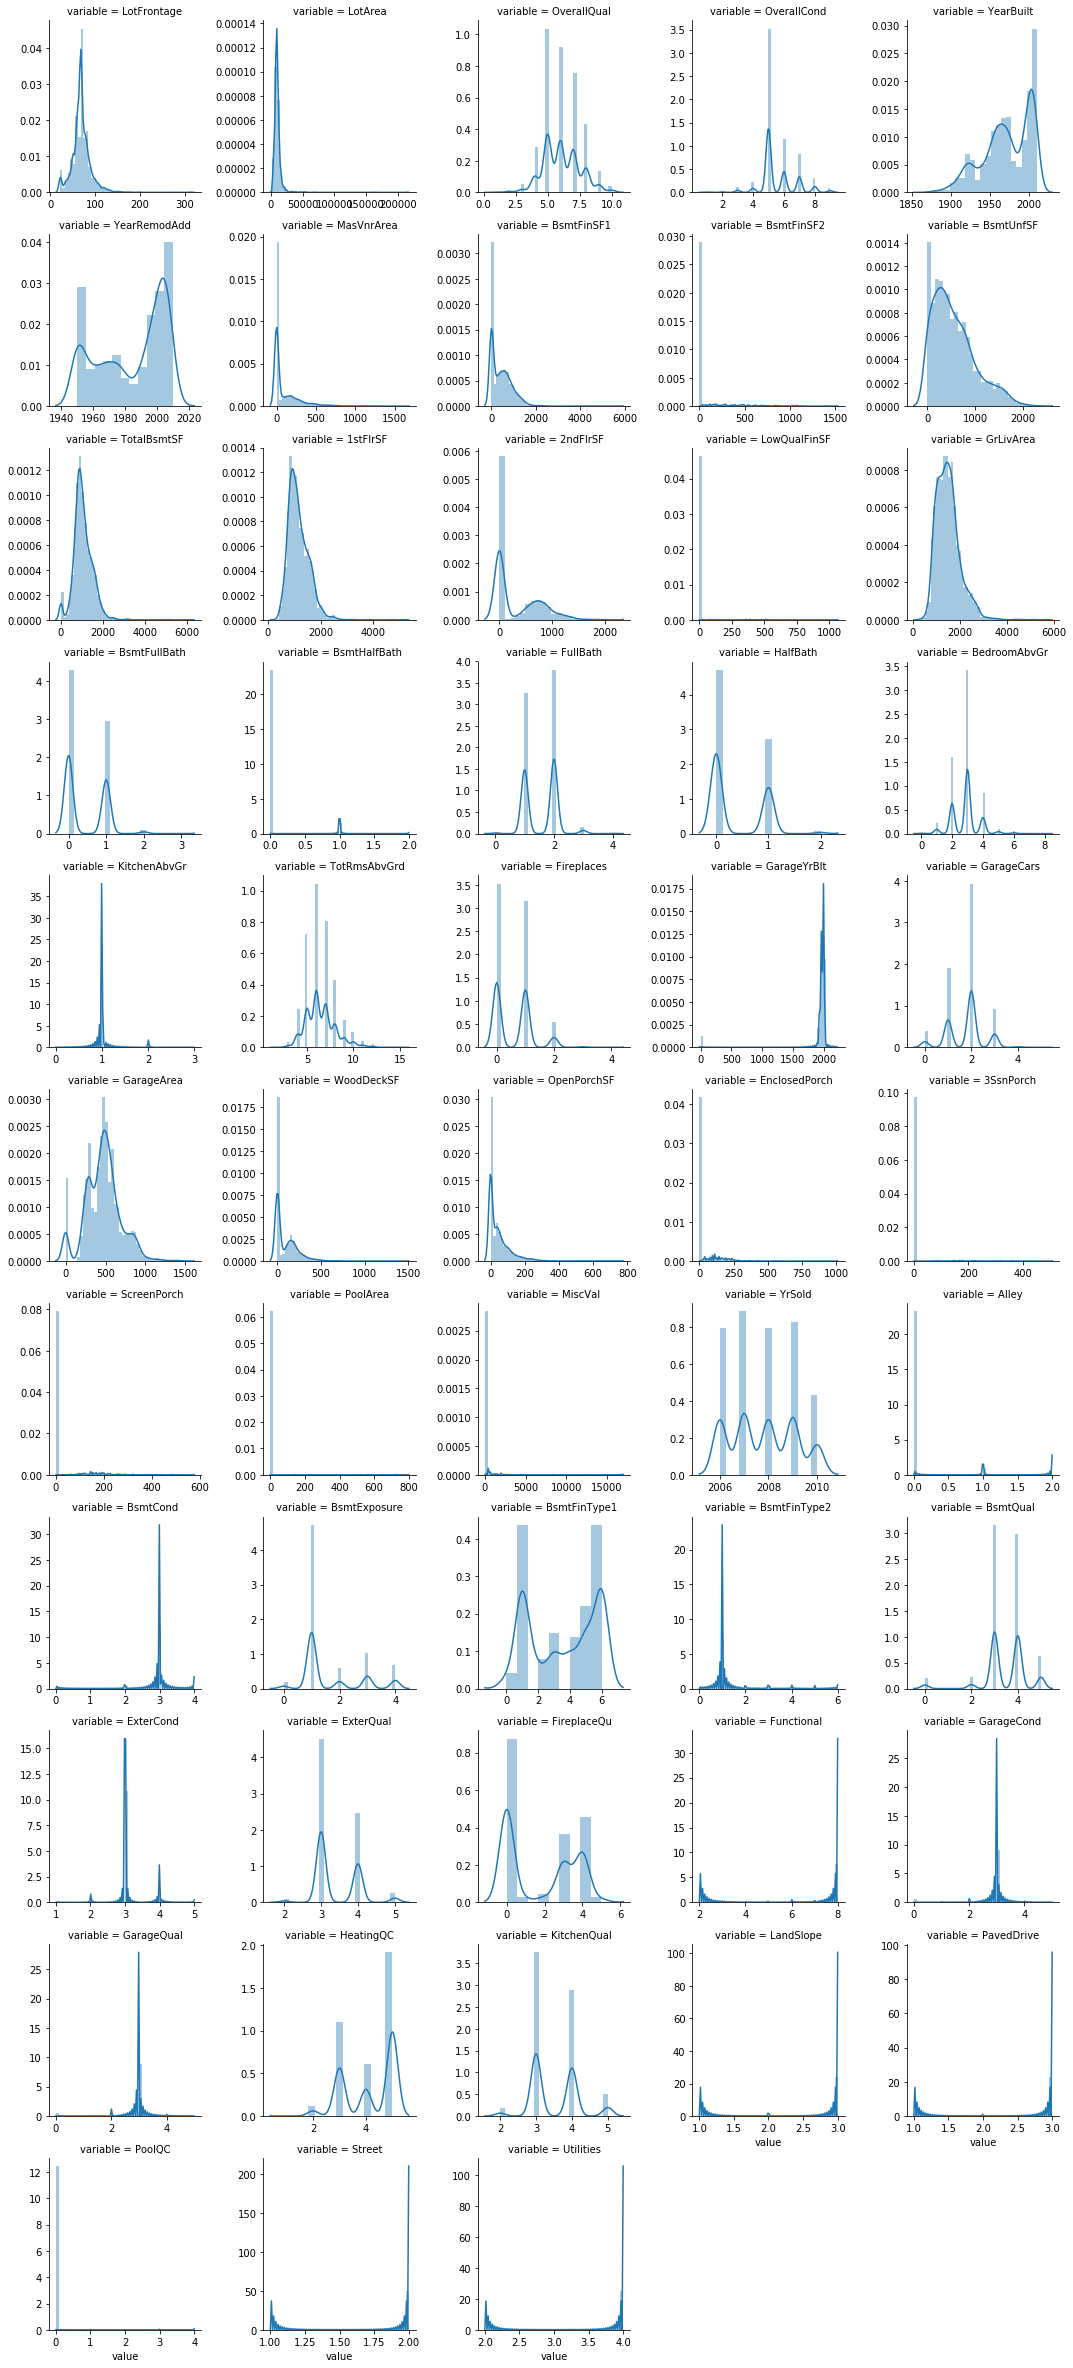

In [17]:
# visualize the distribution of each numerical feature
temp = pd.melt(df.drop('SalePrice',axis=1), value_vars=quan)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=5 , size=3.0, 
                     aspect=1.0,sharex=False, sharey=False)
grid.map(sns.distplot, "value")
plt.show()